# Face Detection Example comparing Dlib and MTCNN face detector


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
!apt-get install build-essential cmake
!apt-get install libopenblas-dev liblapack-dev 
!pip3 install dlib
!pip3 install face_recognition

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
liblapack-dev is already the newest version (3.7.1-4ubuntu1).
libopenblas-dev is already the newest version (0.2.20+ds-4).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.p

In [ ]:
!pip3 install mtcnn
!pip3 install opencv-contrib-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 5.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!ls -la face_recognition/tests/test_images/

total 3152
drwxr-xr-x 2 root root   4096 Jun 30 11:18 .
drwxr-xr-x 3 root root   4096 Jun 30 11:18 ..
-rw-r--r-- 1 root root 887446 Jun 30 11:18 32bit.png
-rw-r--r-- 1 root root 353723 Jun 30 11:18 biden.jpg
-rw-r--r-- 1 root root 184455 Jun 30 11:18 obama2.jpg
-rw-r--r-- 1 root root 595944 Jun 30 11:18 obama3.jpg
-rw-r--r-- 1 root root 279922 Jun 30 11:18 obama.jpg
-rw-r--r-- 1 root root 478346 Jun 30 11:18 obama_partial_face2.jpg
-rw-r--r-- 1 root root 423060 Jun 30 11:18 obama_partial_face.jpg


**Timing the MTCNN Detector**

In [148]:
from mtcnn.mtcnn import MTCNN
import cv2

filename = "/content/drive/My Drive/face_datasets/natural_light/0_natural.jpg"
img = cv2.imread(filename)
detector = MTCNN()

In [149]:
%%timeit

face_locations = detector.detect_faces(img)

1 loop, best of 5: 1.52 s per loop


In [150]:
detector.detect_faces(img)

[{'box': [1417, 797, 588, 724],
  'confidence': 0.9989283680915833,
  'keypoints': {'left_eye': (1591, 1102),
   'mouth_left': (1604, 1359),
   'mouth_right': (1855, 1358),
   'nose': (1726, 1231),
   'right_eye': (1866, 1093)}}]

**Timing the Dlib-based Face Detector**

In [151]:
from PIL import Image
import face_recognition

# Load the jpg file into a numpy array
image = face_recognition.load_image_file(filename)

In [152]:
%%timeit 

# Find all the faces in the image using the default HOG-based model.
# This method is fairly accurate, but not as accurate as the CNN model and not GPU accelerated.
# See also: find_faces_in_picture_cnn.py
face_locations = face_recognition.face_locations(image)

1 loop, best of 5: 4.31 s per loop


Found 1 face(s) in this photograph.
A face is located at pixel location Top: 872, Left: 1389, Bottom: 1538, Right: 2055


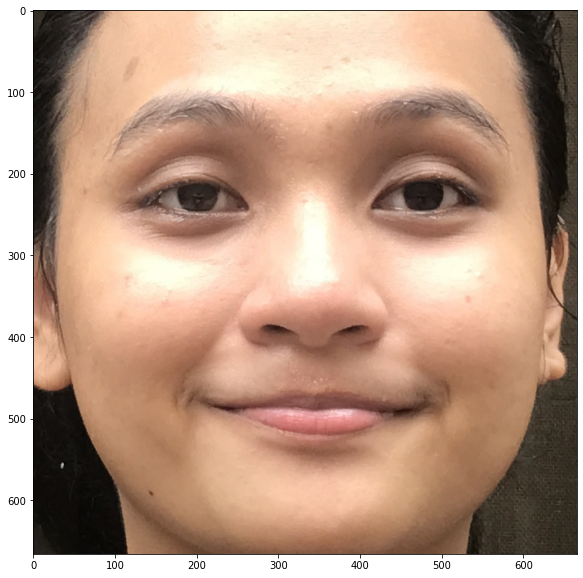

In [153]:
%matplotlib inline

from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]

face_locations = face_recognition.face_locations(image)

print("Found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_image = image[top:bottom, left:right]
    plt.imshow(face_image)
    plt.show()